In [ ]:
import numpy as np
a = np.arange(32).reshape(2,2,2,2,2)

def f(array, order):
        slic = (slice(None), slice(None), slice(None,None,-1), slice(None,None,-1), slice(None,None,-1))
        if order == "th":
            return np.copy(array[slic[2::-1]])
        if order == "tf":
            return np.copy(array[slic[:-2:-1]])
        return np.copy(array)

f(a, "th")


going from analog to digital signal is incoding, basic is 16 bit encoding


USE np.linspace(start,stop,N)
###returns an array that starts at the start point, stops at the stop point inclusive, and divides it so that there are N elements in array total
also can use np.sin on all of them at once

taking analog signal and getting our digital signal, don't need to worry about 16 bit encoding



##cast as 16 int numpy array cuz no need to waste space

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import librosa

%matplotlib notebook

samples, fs = librosa.load(r"/Users/Daniel/Desktop/MUSIC/Halsey - Gasoline (Audio).mp3", sr=44100, mono=True)


fig, ax = plt.subplots()
S, freqs, times, im = ax.specgram(samples[::1000], NFFT=4096, Fs=fs,
                                                      window=mlab.window_hanning,
                                                      noverlap=(4096 // 2))
fig.colorbar(im)  # adds colorbar to figure





In [ ]:

   """if(isinstance(load, str)):
            with open(load, "r") as F:
                data = np.asanyarray([[float(i) for i in j.split('\t')] for j in F])
                self.songDatabase = {
                assert something"""

In [32]:
import librosa
import collections
import json #figure out which functino i need and only pick the relevant one
import numpy as np
import matplotlib.pyplot as plt #only for plot
import matplotlib.mlab as mlab #only for plot
from microphone import record_audio, play_audio
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion, iterate_structure
%matplotlib notebook


class songFP:

    def __init__(self, load = None):
        self.songDatabase = {} # "Song Title" : (Seconds(int), Song(hex))
        self.peakDatabase = {} # "Song Title" : 
        self.recordings = 0
        self.fig, self.ax = plt.subplots()
        pass

    def importFile(self, file):
        pass

    def record(self, seconds, title = "Recording"):
        """Adds a recording to the database.

        Parameters
        ----------
        seconds : int
            the duration of the recording in seconds
        title : string
            the name of the recording (default "Recording 1,2,3...")
            
        Returns
        -------
        None
        """
        #Records audio
        byte_encoded_signal, sampling_rate = record_audio(seconds)   
        
        #Saves full recording for playback
        if title == "Recording":
            self.songDatabase[title + " " + str(self.recordings + 1)] = (seconds, byte_encoded_signal)
            self.recordings += 1
        else:
            self.songDatabase[title] = (seconds, byte_encoded_signal)
        
        #Converts from hex to decimal
        for e in range(len(byte_encoded_signal)):
            byte_encoded_signal[e] = np.fromstring(byte_encoded_signal[e], dtype=np.int16)

        #Saves recording's fingerprints
        self.peakDatabase["1"] = self._findPeaks(np.hstack(byte_encoded_signal))
        return None 
            
    def importArray(self, nparray):
        pass
            
    def deleteSong(self, song):
        pass

    def listSongs(self):
        pass
    
    def _findPeaks(self, sampledSong):
        """Find the peaks of the given sampled song.

        Parameters
        ----------
        sampledSong : numpy.ndarray[np.int16]
             audio sampled at 44100 Hz
             
        Returns
        -------
        peaks : ?
            all peaks for sampled song
        """
        #Define structure for local neighborhood
        struct = generate_binary_structure(2, 1)
        neighborhood = iterate_structure(struct, 20)
        
        #Convert the sampled audio into spectrogram and cut out quietest 77%
        S, freqs, times, im = self.ax.specgram(sampledSong, NFFT=4096, Fs=44100, window=mlab.window_hanning, noverlap=(4096 // 2))
        ys, xs = np.histogram(S.flatten(), bins=len(freqs)//2, normed=True)
        dx = xs[-1] - xs[-2]
        cdf = np.cumsum(ys)*dx  # this gives you the cumulative distribution of amplitudes
        cutoff = xs[np.searchsorted(cdf, 0.77)]
        foreground =  (S >= cutoff)
        S = S*foreground
        peaks = maximum_filter(S, footprint=neighborhood)
        
        print(times)
        print(peaks)
        pass

    def _match(self, peaks):
        pass
            
    def save(self, fileLocation):
        pass
                    
    def playSong(self, songName):
        play_audio(self.songDatabase[songName][1], self.songDatabase[songName][0])
        pass

#when using dict.get(), make sure to assert that it is not None and if so then raise a missingkey error
#from IPython.display import Audio
#assert that every arugment entered is in correct format

<IPython.core.display.Javascript object>


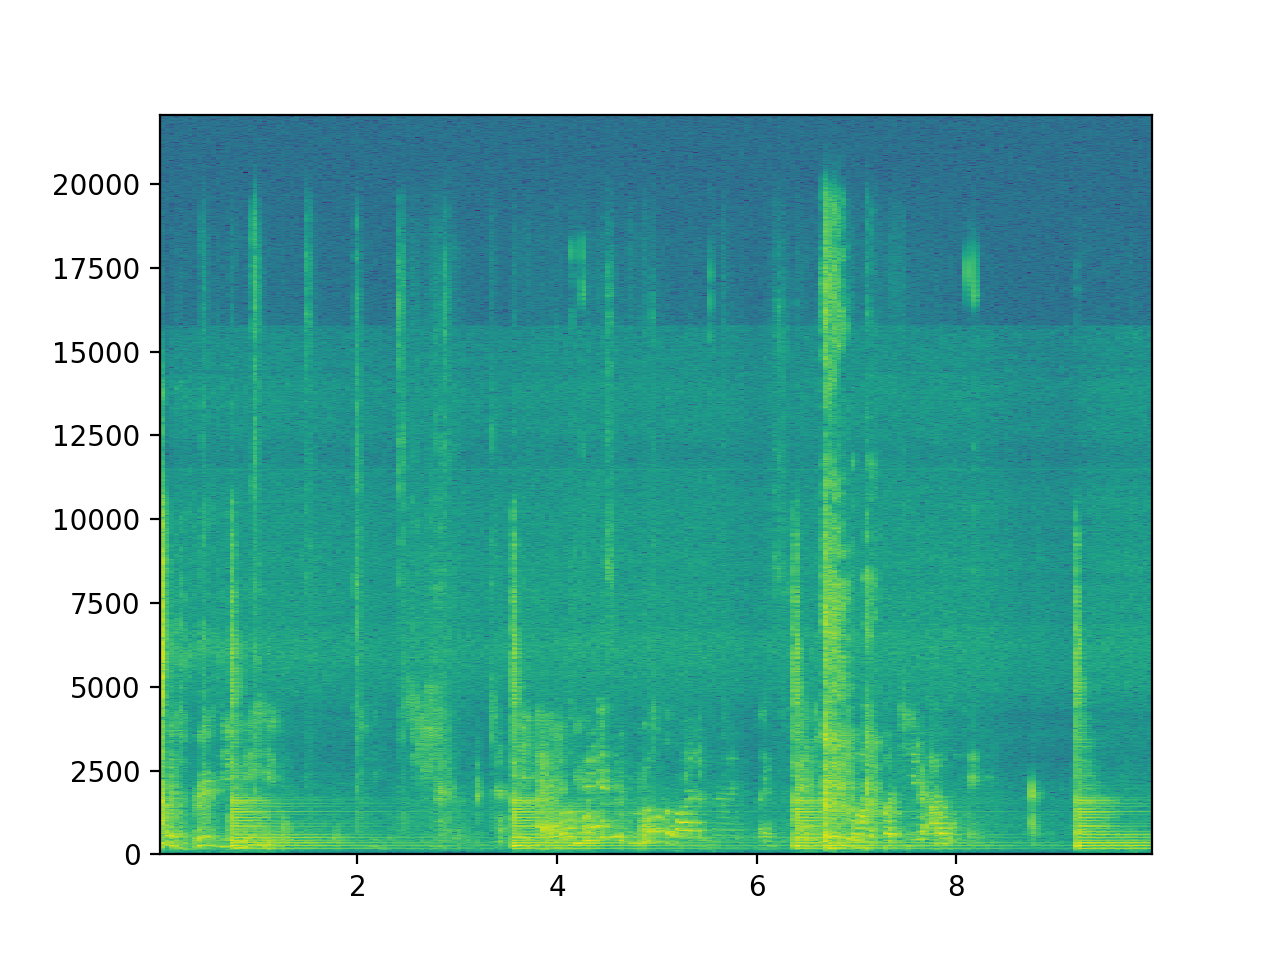

Using input device 'Built-in Microphone'
Recording ended
[ 0.04643991  0.09287982  0.13931973  0.18575964  0.23219955  0.27863946
  0.32507937  0.37151927  0.41795918  0.46439909  0.510839    0.55727891
  0.60371882  0.65015873  0.69659864  0.74303855  0.78947846  0.83591837
  0.88235828  0.92879819  0.9752381   1.021678    1.06811791  1.11455782
  1.16099773  1.20743764  1.25387755  1.30031746  1.34675737  1.39319728
  1.43963719  1.4860771   1.53251701  1.57895692  1.62539683  1.67183673
  1.71827664  1.76471655  1.81115646  1.85759637  1.90403628  1.95047619
  1.9969161   2.04335601  2.08979592  2.13623583  2.18267574  2.22911565
  2.27555556  2.32199546  2.36843537  2.41487528  2.46131519  2.5077551
  2.55419501  2.60063492  2.64707483  2.69351474  2.73995465  2.78639456
  2.83283447  2.87927438  2.92571429  2.9721542   3.0185941   3.06503401
  3.11147392  3.15791383  3.20435374  3.25079365  3.29723356  3.34367347
  3.39011338  3.43655329  3.4829932   3.52943311  3.57587302  3.6223

In [35]:
ok = songFP()
ok.record(10, title = "dank")

<IPython.core.display.Javascript object>


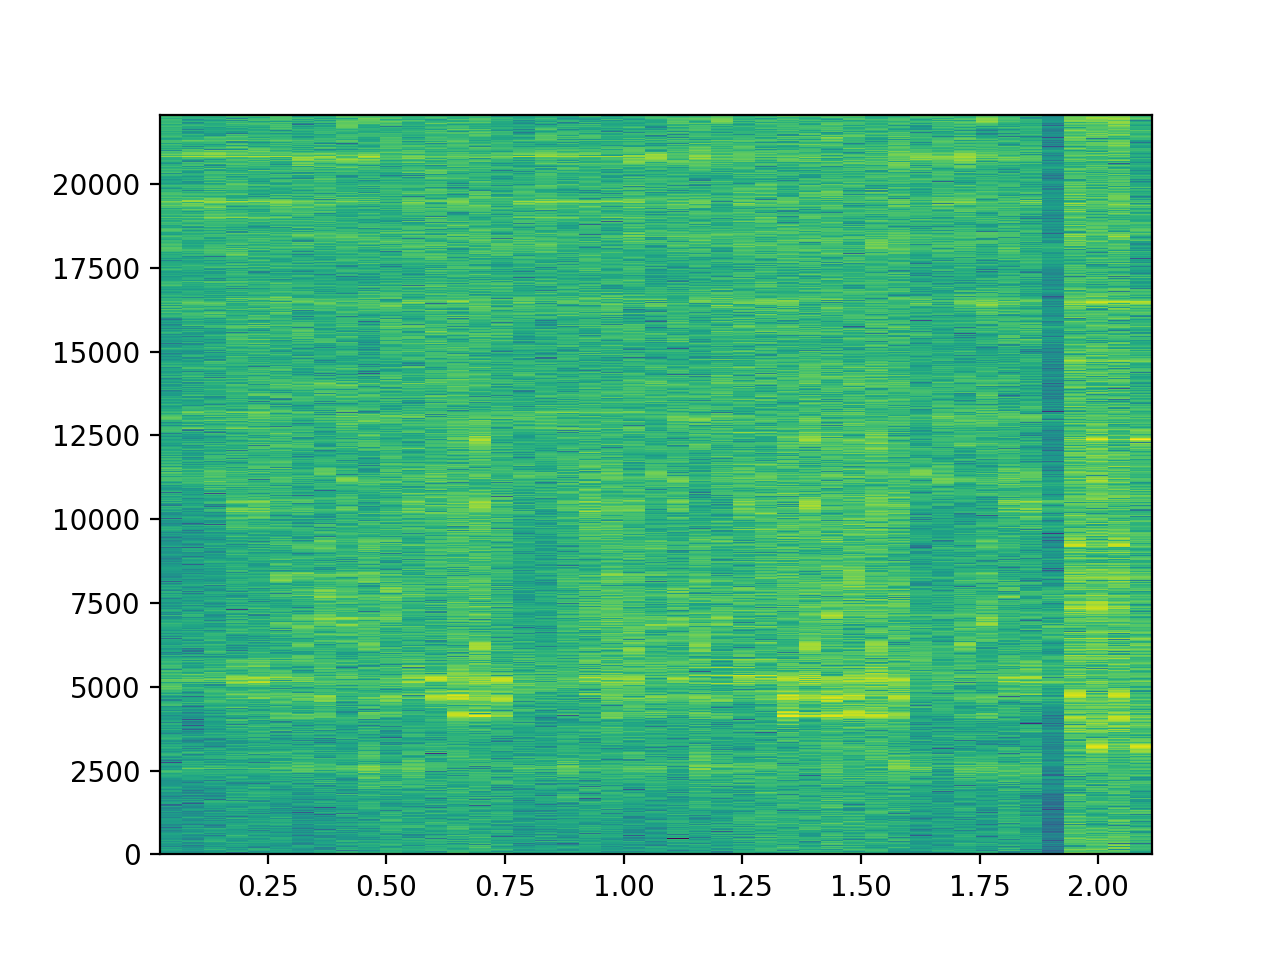

84009 2049 41
8707968 44100
[ 0.04643991  0.09287982  0.13931973  0.18575964  0.23219955  0.27863946
  0.32507937  0.37151927  0.41795918  0.46439909  0.510839    0.55727891
  0.60371882  0.65015873  0.69659864  0.74303855  0.78947846  0.83591837
  0.88235828  0.92879819  0.9752381   1.021678    1.06811791  1.11455782
  1.16099773  1.20743764  1.25387755  1.30031746  1.34675737  1.39319728
  1.43963719  1.4860771   1.53251701  1.57895692  1.62539683  1.67183673
  1.71827664  1.76471655  1.81115646  1.85759637  1.90403628]


In [3]:
fig, ax = plt.subplots()
samples, fs = librosa.load(r"/Users/Daniel/Desktop/MUSIC/Halsey - Gasoline (Audio).mp3", sr=44100, mono=True) #song number 1
S, freqs, times, im = ax.specgram(samples[::100], NFFT=4096, Fs=fs,
                                                      window=mlab.window_hanning,
                                                      noverlap=(4096 // 2)) 

        
samples2, fs2 = librosa.load(r"/Users/Daniel/Desktop/MUSIC/Halsey - Now Or Never (Audio).mp3", sr=44100, mono=True) #song number 2
S2, freqs2, times2, im2 = ax.specgram(samples2[::100], NFFT=4096, Fs=fs2,
                                                      window=mlab.window_hanning,
                                                      noverlap=(4096 // 2)) 

samples3, fs3 = librosa.load(r"/Users/Daniel/Desktop/MUSIC/David Guetta ft.Justin Bieber - 2U.mp3", sr=44100, mono=True) #song number 2
S3, freqs3, times3, im3 = ax.specgram(samples3[::100], NFFT=4096, Fs=fs3,
                                                      window=mlab.window_hanning,
                                                      noverlap=(4096 // 2))
print(S.size, freqs.size, times.size)                                                
print(samples.size, fs2)
print(times)

In [ ]:
database = {}

def addtodb(name, spec, frequencies, thetimes):
    
    ys, xs = np.histogram(spec.flatten(), bins=len(freqs)//2, normed=True)
    dx = xs[-1] - xs[-2]
    cdf = np.cumsum(ys)*dx  # this gives you the cumulative distribution of amplitudes
    cutoff = xs[np.searchsorted(cdf, 0.77)]

    foreground = (spec >= cutoff)
    
    a = np.where(foreground, spec, 0)
    bins = np.argwhere(a)
    
    
    for i in range(bins.shape[0] - 1):
        for j in range(20):
            if (i + 1 + j) < bins.shape[0]:
                t1 = np.round(thetimes[bins[i + j][1]],2)
                f1 = np.round(frequencies[bins[i + j][0]],2)
                t2 = np.round(thetimes[bins[i + 1 + j][1]], 2)
                f2 = np.round(frequencies[bins[i + 1 + j][0]], 2)
                x = (f1, f2, t2 - t1)
                if x in database:
                    database[x].append((name,t1))
                else:
                    database[x] = [(name, t1)]  
#     return database
    
addtodb("what u need", S2, freqs2, times2)
addtodb("im the one", S, freqs, times)
addtodb("in the night", S3, freqs, times3)

In [ ]:

def match_song(db, excerpt): #note to self: excerpt = [(f1,f2,deltaT),(),]
    templist = []
    for notes in excerpt:
        if (notes in database):
            templist.append(tuple(database[notes]))
    print(templist)
    counts = collections.Counter(templist)
    return counts.most_common()[0][0][0]

match_song(database, [(0,0,0.51)])
#(323.0, 323.0, 0.040000000000000036)